In [1]:
pip install tensorflow

In [2]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
from tensorflow.keras.models import Sequential

In [24]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
X_train = np.loadtxt('input.csv',delimiter=',')
Y_train = np.loadtxt('labels.csv',delimiter=',')

X_test = np.loadtxt('input_test.csv',delimiter=',')
Y_test =  np.loadtxt('labels_test.csv',delimiter=',')

In [19]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(X_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train= X_train/255.0
X_test=X_test/255.0

In [17]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)


Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


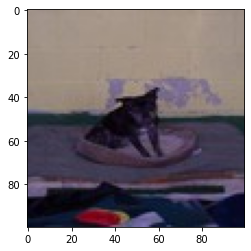

In [26]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])

In [32]:
model= Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
           
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [36]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 11s 342ms/step - loss: 0.5009 - accuracy: 0.7635
Epoch 2/5
32/32 [==============================] - 11s 330ms/step - loss: 0.4731 - accuracy: 0.7705
Epoch 3/5
32/32 [==============================] - 10s 322ms/step - loss: 0.4149 - accuracy: 0.8045
Epoch 4/5
32/32 [==============================] - 10s 324ms/step - loss: 0.3689 - accuracy: 0.8345
Epoch 5/5
32/32 [==============================] - 11s 335ms/step - loss: 0.3346 - accuracy: 0.8500


In [39]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 31ms/step - loss: 0.6795 - accuracy: 0.6550


[0.6794857978820801, 0.6549999713897705]

making predictions


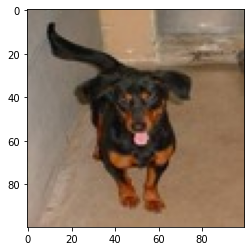

1/1 [==============================] - 0s 22ms/step
[[0.02682855]]
our model says it is a : dog


In [44]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(y_pred)
y_pred=y_pred>0.5

if(y_pred == 0):
    pred='dog'
else:
    pred='cat'
print('our model says it is a :',pred)